# Financial Plot

In [ ]:
import logging

import numpy as np
import pandas as pd


from mplchart.samples import sample_prices
from mplchart.indicators import SMA, EMA, SLOPE, RSI
from mplchart.locators import DateIndexLocator, DTArrayLocator
from mplchart.formatters import DateIndexFormatter, DTArrayFormatter

import matplotlib.pyplot as plt
import matplotlib.ticker as tck


from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('svg')

logging.basicConfig()
logging.getLogger("mplchart").setLevel(logging.DEBUG)


In [13]:
from mplchart.samples import sample_prices

FREQ = "daily"
prices = sample_prices(freq=FREQ)

prices = prices.assign(
    sma20=SMA(20),
    sma50=SMA(50),
    slope = SLOPE(20),
    rsi14 = RSI(14)
)

prices

,open,high,low,close,volume,sma20,sma50,slope,rsi14
date,,,,,,,,,
1980-12-12,0.099058,0.099488,0.099058,0.099058,469033600,NaN,NaN,NaN,NaN
1980-12-15,0.094321,0.094321,0.093890,0.093890,175884800,NaN,NaN,NaN,NaN
1980-12-16,0.087429,0.087429,0.086999,0.086999,105728000,NaN,NaN,NaN,NaN
1980-12-17,0.089152,0.089582,0.089152,0.089152,86441600,NaN,NaN,NaN,NaN
1980-12-18,0.091736,0.092167,0.091736,0.091736,73449600,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-05-29,189.610001,192.250000,189.509995,190.289993,53068000,185.652359,176.423375,0.862896,64.411098
2024-05-30,190.759995,192.179993,190.630005,191.289993,49947900,186.763325,176.732345,0.681618,65.889758
2024-05-31,191.440002,192.570007,189.910004,192.250000,75158300,187.736044,177.008785,0.539457,67.294615


DEBUG:mplchart.locator:tick_values np.float64(0.0), np.float64(1.0), 16
DEBUG:mplchart.datetimes:dates_ticks np.datetime64('2023-06-07T00:00:00'), np.datetime64('2023-06-08T00:00:00'), 16
DEBUG:mplchart.locator:tick_values np.float64(-12.450000000000001), np.float64(261.45), 16
DEBUG:mplchart.datetimes:dates_ticks np.datetime64('2023-06-07T00:00:00'), np.datetime64('2024-06-04T00:00:00'), 16
DEBUG:mplchart.datetimes:dates_ticks np.timedelta64(1960200,'s'), 'W', 2
DEBUG:mplchart.locator:tick_values np.float64(-12.725000000000001), np.float64(261.725), 16
DEBUG:mplchart.datetimes:dates_ticks np.datetime64('2023-06-07T00:00:00'), np.datetime64('2024-06-04T00:00:00'), 16
DEBUG:mplchart.datetimes:dates_ticks np.timedelta64(1960200,'s'), 'W', 2
DEBUG:mplchart.locator:tick_values np.float64(-12.725000000000001), np.float64(261.725), 18
DEBUG:mplchart.datetimes:dates_ticks np.datetime64('2023-06-07T00:00:00'), np.datetime64('2024-06-04T00:00:00'), 18
DEBUG:mplchart.datetimes:dates_ticks np.tim

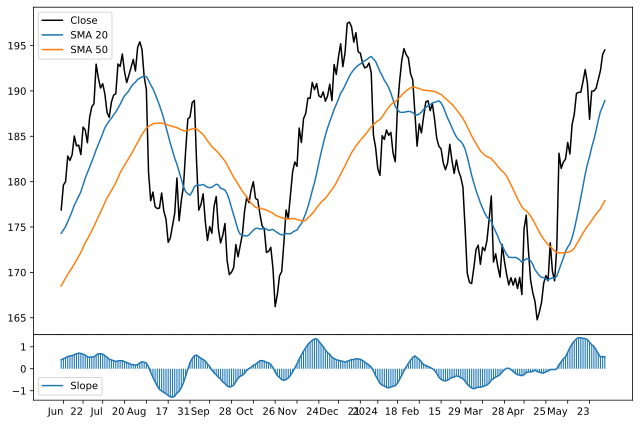

In [18]:
import matplotlib.pyplot as plt

def plot_prices(prices, max_bars=250):
    prices = prices.tail(max_bars)

    nrows = 2
    height_ratios = [1] + [0.2] * (nrows - 1)

    gridspec_kw = dict(height_ratios=height_ratios, hspace=0)

    fig, axes = plt.subplots(
        nrows, sharex=True, tight_layout=True, figsize=(9, 6), gridspec_kw=gridspec_kw
    )

    locator = DTArrayLocator(prices.index)
    formatter = DTArrayFormatter(prices.index)


    #axes[0].set_xticks([], minor=False)
    #axes[0].xaxis.set_minor_locator(tck.NullLocator())
    axes[0].xaxis.set_major_locator(locator)
    axes[0].xaxis.set_major_formatter(formatter)
    axes[0].set_xticks([], minor=True)
    
    fig.autofmt_xdate(which='major', rotation=45, ha='right')

    # To remove minor ticks from the x-axis
    #axes[0].xaxis.set_minor_locator(tck.NullLocator())
    #axes[0].xaxis.minorticks_off()

    prices = prices.reset_index()

    prices.plot(y="close", ax=axes[0], color="black", label="Close")
    prices.plot(y="sma20", ax=axes[0], label="SMA 20")
    prices.plot(y="sma50", ax=axes[0], label="SMA 50")
    prices.plot(y="slope", ax=axes[1], label="Slope")

    axes[1].bar(x=np.asarray(prices.index, float), height=prices.slope, width=0.5, label="Slope")

#    axes[0].plot(prices.index, prices.close, label="Close", color="black")
#    axes[0].plot(prices.index, prices.close, label="Close", color="black")


plot_prices(prices, 250)


In [5]:
from mplchart.datetimes import date_ticks

dates = prices.index.values

ticks = date_ticks(dates[-1000:], 18)
ticks

array([ 11,  81, 140, 210, 266, 329, 399, 469, 532, 602, 672, 735, 805,
       875, 945])

In [6]:
ticks[1:] - ticks[:-1]

array([70, 59, 70, 56, 63, 70, 70, 63, 70, 70, 63, 70, 70, 70])